# Data Science template - Titanic Case

Deze notebook begeleidt je stap voor stap door de **Titanic**-case op Kaggle.
De focus ligt op de standaard Data Science workflow:

1. Probleemdefinitie en doel
2. Data-input & Data cleaning
3. Verkenning (EDA)
4. Feature engineering
5. Modelleren (baseline → verbeterde modellen)
6. **Voorspelling** en export van `submission.csv`

> 🎯 Doel: voorspel de kans dat een passagier de Titanic-vaart heeft overleefd (`Survived`).

## 0. Doel & Omgevings-setup

- Download `train.csv` en `test.csv` handmatig van de Titanic-competitiepagina en plaats ze in een bijvoorbeeld in dezelfde map als dit bestand.


In [94]:
# !python --version


## 1. Imports

In [95]:
import pandas as pd
import numpy as np

# Visualisatie
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

# Hiermee laat je alle kolommen standaard zien
pd.set_option('display.max_columns', None)

## 2. Probleemdefinitie

- **Input**: passagiersgegevens zoals `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`, etc.
- **Output**: binaire target `Survived` (0 = niet overleefd, 1 = overleefd).
- **Metric (Kaggle leaderboard)**: **Accuracy** op de testset (zonder labels).


## 3. Data inladen

In [96]:
# Je gaat werken met de train data. In de test data staan de Survived kolom niet ingevuld. Deze moet je dus zelf voorspellen.

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.shape, test.shape)
train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Snelle datacheck & Preprocessing

Waar missen we (rijen met) data? Je kan missende data invullen door bijvoorbeeld voor bepaalde soort data op een bepaalde manier in te vullen:

- Numeriek: imputatie (median) + scaling
- Categorisch: imputatie (most_frequent) + one-hot encoding

Dit hoeft niet, het is extra.

In [97]:
display(train.sample(5, random_state=42))
display(train.describe(include='all'))

# dit laat ziet hoeveel waardes van het totaal er missen
train.isna().mean().sort_values(ascending=False).round(2)[:10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Cabin          0.77
Age            0.20
Embarked       0.00
PassengerId    0.00
Name           0.00
Pclass         0.00
Survived       0.00
Sex            0.00
Parch          0.00
SibSp          0.00
dtype: float64

## 5. Verkennende Data Analyse (EDA)

> Tip: Voeg hier extra grafieken toe (bijv. histogrammen, boxplots, countplots per feature).


In [98]:
#een aantal simpel te verkrijgen statistieken voor eerste introductie tot de data

#functie om tabellen naast elkaar te kunnen zetten m.b.v. ChatGPT
def show_side_by_side(dfs, titles=None):
    html = ""
    for i, df in enumerate(dfs):
        title_html = f"<div style='text-align:center;font-weight:bold;margin-bottom:6px'>{titles[i]}</div>" if titles else ""
        html += f"<div style='display:inline-block; vertical-align:top; margin-right:20px; padding:6px;'>{title_html}{df.to_html()}</div>"
    display_html(html, raw=True)

#overlevingspercentages per categorie
df1 = pd.crosstab(train['Sex'], train['Survived'], normalize='index', dropna=True)
df2 = pd.crosstab(train['Embarked'], train['Pclass'], normalize='index', dropna=True)
df3 = pd.crosstab([train['Sex'], train['SibSp']], train['Survived'], normalize='index', dropna=True)
df4 = pd.crosstab([train['Sex'], train['Parch']], train['Survived'], normalize='index', dropna=True)


#frequenties per combinatie ter databetrouwbaarheid
df5 = pd.crosstab(train['Sex'], train['SibSp'], dropna=True)
df6 = pd.crosstab(train['Sex'], train['Parch'], dropna=True)


#weergeve
show_side_by_side([df1, df2], ["Sex vs Survival", "Embarked vs Pclass"])
show_side_by_side([df3, df4], ["Sex & SibSp vs Survival", "Sex & Parch vs Survival"])
show_side_by_side([df5, df6], ["Sex & SibSp counts", "Sex & Parch counts"])


Sex vs Survival 
 
 
 Survived 
 0 
 1 
 
 
 Sex 
 
 
 
 
 
 
 female 
 0.257962 
 0.742038 
 
 
 male 
 0.811092 
 0.188908 
 
 
 Embarked vs Pclass 
 
 
 Pclass 
 1 
 2 
 3 
 
 
 Embarked 
 
 
 
 
 
 
 
 C 
 0.505952 
 0.101190 
 0.392857 
 
 
 Q 
 0.025974 
 0.038961 
 0.935065 
 
 
 S 
 0.197205 
 0.254658 
 0.548137

Sex & SibSp vs Survival 
 
 
 
 Survived 
 0 
 1 
 
 
 Sex 
 SibSp 
 
 
 
 
 
 
 female 
 0 
 0.212644 
 0.787356 
 
 
 1 
 0.245283 
 0.754717 
 
 
 2 
 0.230769 
 0.769231 
 
 
 3 
 0.636364 
 0.363636 
 
 
 4 
 0.666667 
 0.333333 
 
 
 5 
 1.000000 
 0.000000 
 
 
 8 
 1.000000 
 0.000000 
 
 
 male 
 0 
 0.831797 
 0.168203 
 
 
 1 
 0.689320 
 0.310680 
 
 
 2 
 0.800000 
 0.200000 
 
 
 3 
 1.000000 
 0.000000 
 
 
 4 
 0.916667 
 0.083333 
 
 
 5 
 1.000000 
 0.000000 
 
 
 8 
 1.000000 
 0.000000 
 
 
 Sex & Parch vs Survival 
 
 
 
 Survived 
 0 
 1 
 
 
 Sex 
 Parch 
 
 
 
 
 
 
 female 
 0 
 0.211340 
 0.788660 
 
 
 1 
 0.233333 
 0.766667 
 
 
 2 
 0.387755 
 0.612245 
 
 
 3 
 0.250000 
 0.750000 
 
 
 4 
 1.000000 
 0.000000 
 
 
 5 
 0.750000 
 0.250000 
 
 
 6 
 1.000000 
 0.000000 
 
 
 male 
 0 
 0.834711 
 0.165289 
 
 
 1 
 0.672414 
 0.327586 
 
 
 2 
 0.677419 
 0.322581 
 
 
 3 
 1.000000 
 0.000000 
 
 
 4 
 1.000000 
 0.000000 
 
 
 5 
 1.000000 
 0.000000

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,174,106,13,11,6,1,3
male,434,103,15,5,12,4,4
Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,194,60,49,4,2,4,1
male,484,58,31,1,2,1,0


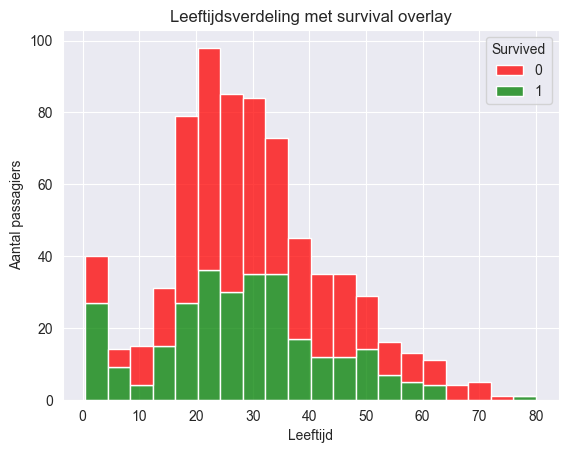

In [99]:
#plot om verband weer te geven tussen Age en Survived
sns.histplot(data=train, x="Age", hue="Survived", palette=["red","green"], multiple="stack", bins=20)
plt.xlabel("Leeftijd")
plt.ylabel("Aantal passagiers")
plt.title("Leeftijdsverdeling met survival overlay")
plt.show()

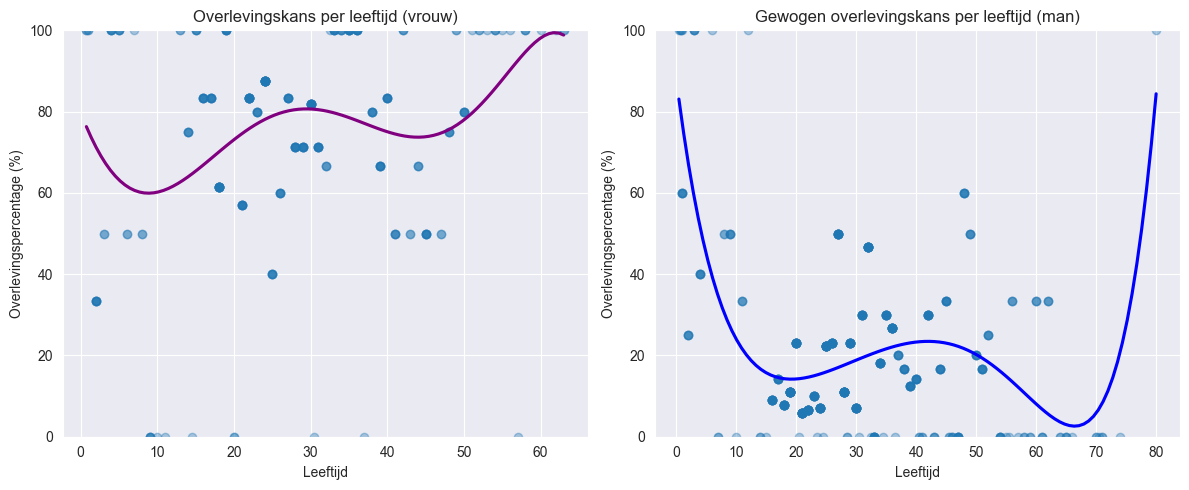

In [100]:
#plot om verband weer te geven tussen Age & Sex en overlevingskans

#nieuwe dataframe met een extra kolom voor de overlevingskans in procenten per leeftijd per geslacht
survival_by_age_gender = train.dropna(subset=['Age','Sex']).groupby(['Sex','Age']).agg(SurvivalRate=('Survived','mean'),Count=('Survived','count')).reset_index().assign(SurvivalRate=lambda df: df['SurvivalRate']*100)

#toevoegen van weging om leeftijden met minder datapunten minder zwaar te laten meetellen voor het plotten van de trendlijn
survival_by_age_gender_weighted = survival_by_age_gender.loc[survival_by_age_gender.index.repeat(survival_by_age_gender['Count'])]

#instellen van de subplot
fig, axes = plt.subplots(1,2, figsize=(12,5))

#plotten van overlevingskans voor vrouwen per leeftijd met een weging gebaseerd op de hoeveelheid datapunten per leeftijd voor de trendlijn
sns.regplot(data=survival_by_age_gender_weighted[survival_by_age_gender_weighted['Sex']=='female'], x='Age', y='SurvivalRate', order=6, scatter_kws={'alpha':0.35}, line_kws={'color':'purple'}, ci=None, ax=axes[0])
axes[0].set_title('Overlevingskans per leeftijd (vrouw)')
axes[0].set_xlabel('Leeftijd')
axes[0].set_ylabel('Overlevingspercentage (%)')
axes[0].set_ylim(0, 100)

#plotten van overlevingskans voor mannen per leeftijd met een weging gebaseerd op de hoeveelheid datapunten per leeftijd voor de trendlijn
sns.regplot(data=survival_by_age_gender_weighted[survival_by_age_gender_weighted['Sex']=='male'], x='Age', y='SurvivalRate', order=6, scatter_kws={'alpha':0.35}, line_kws={'color':'blue'}, ci=None, ax=axes[1])
axes[1].set_title('Gewogen overlevingskans per leeftijd (man)')
axes[1].set_xlabel('Leeftijd')
axes[1].set_ylabel('Overlevingspercentage (%)')
axes[1].set_ylim(0, 100)

#laten zien van de plot
plt.tight_layout()
plt.show()

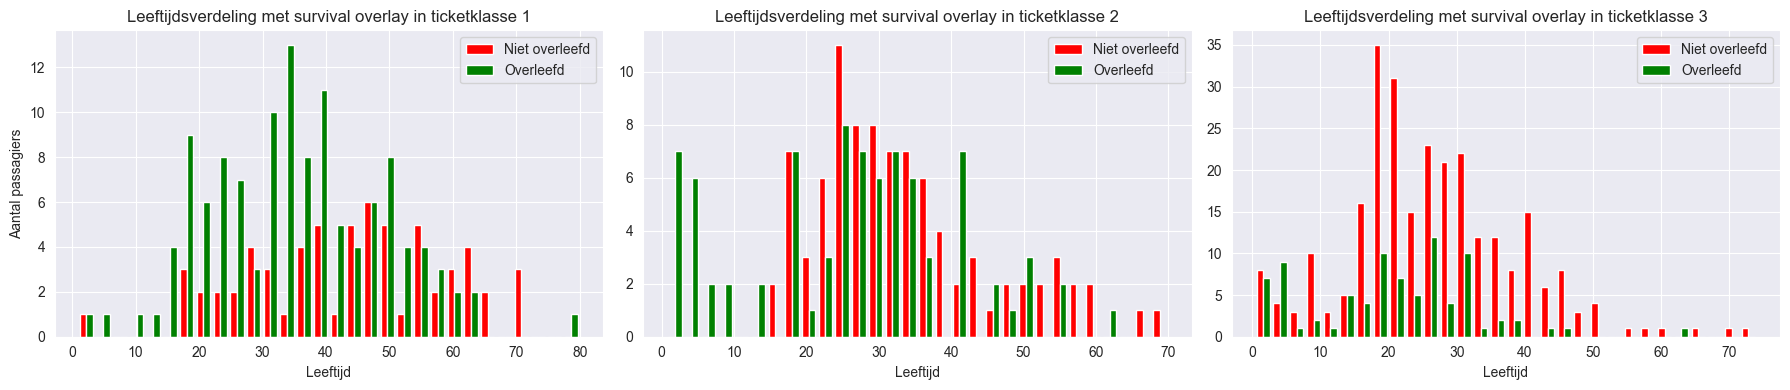

In [101]:
#plot om verband weer te geven tussen Age & Pclass en overlevingskans

#Lijst met alle verschillende ticketklassen aanmaken
classes = sorted(train["Pclass"].unique())

#instellen van de subplot
fig, axes = plt.subplots(1, len(classes), figsize=(6*len(classes), 4))

#for loop om alle plots te maken
for i, c in enumerate(classes):
    subset = train[train["Pclass"] == c]
    axes[i].hist(
        [subset[subset["Survived"]==0]["Age"], subset[subset["Survived"]==1]["Age"]],
        bins=30,
        stacked=False,
        label=["Niet overleefd", "Overleefd"],
        color=["red", "green"],
    )
    axes[i].set_title(f"Leeftijdsverdeling met survival overlay in ticketklasse {c}")
    axes[i].set_xlabel("Leeftijd")
    #zorgt voor enkel ylabel
    if i == 0:
        axes[i].set_ylabel("Aantal passagiers")
    axes[i].legend()

plt.tight_layout()
plt.show()

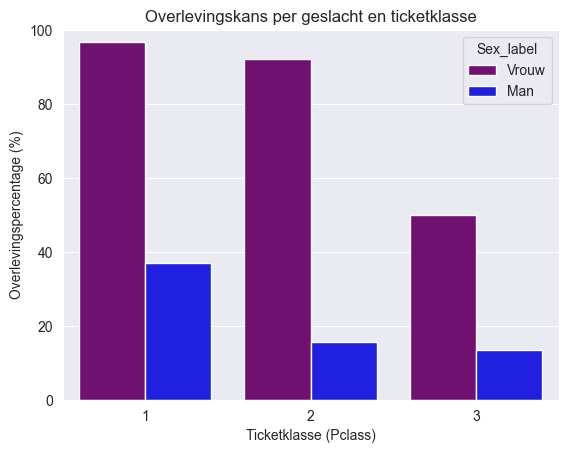

In [102]:
#plot om verband weer te geven tussen Sex & Pclass en overlevingskans

#survival rate per Pclass en Sex berekenen
survival_rate = train.dropna(subset=['Pclass','Sex']).groupby(["Pclass", "Sex"]).agg(SurvivalRate=("Survived", "mean")).reset_index().assign(SurvivalRate=lambda df: df['SurvivalRate']*100)

#Seaborn barplot
# Map Sex naar nette labels voor legenda
survival_rate['Sex_label'] = survival_rate['Sex'].map({'male': 'Man', 'female': 'Vrouw'})

# Seaborn barplot met aangepaste legenda labels
sns.barplot(x="Pclass", y="SurvivalRate", hue="Sex_label", palette={"Vrouw": "purple", "Man": "blue"}, data=survival_rate)

plt.ylim(0, 100)
plt.ylabel("Overlevingspercentage (%)")
plt.xlabel("Ticketklasse (Pclass)")
plt.title("Overlevingskans per geslacht en ticketklasse")
plt.show()

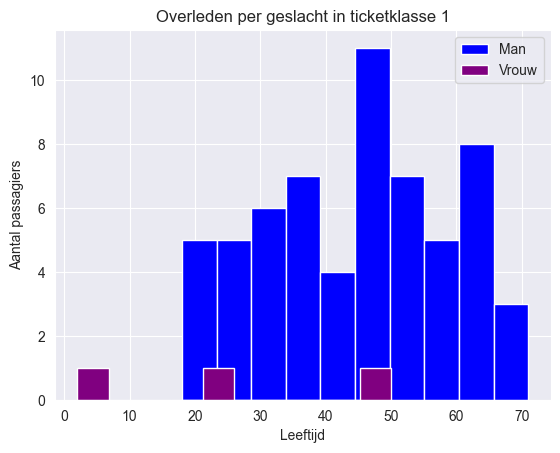

In [103]:
#grafiek om overleden mensen per leeftijd in ticketklasse 1 te bekijken

#selecteer alle mensen die overleden zijn
gestorven = train[train['Survived'] == 0]

#selecteer alle mensen die ticket klasse 1 hebben
overleed_1 = gestorven[gestorven['Pclass'] == 1]

#histogram voor mannen en vrouwen met specifieke kleuren
overleed_1[overleed_1['Sex'] == 'male']['Age'].hist(color='blue')
overleed_1[overleed_1['Sex'] == 'female']['Age'].hist(color='purple')

plt.xlabel('Leeftijd')
plt.ylabel('Aantal passagiers')
plt.legend(['Man', 'Vrouw'])
plt.title('Overleden per geslacht in ticketklasse 1')
plt.show()

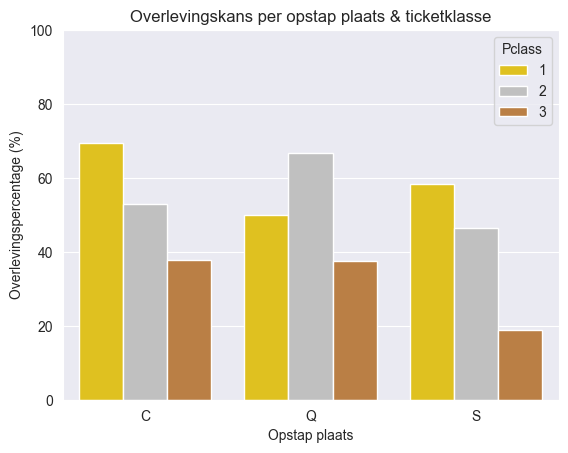

In [104]:
#plot om verband weer te geven tussen Embarked & Pclass en overlevingskans

#survival rate per Embarked en Pclass berekenen
survival_by_embarked = train.dropna(subset=["Embarked", "Pclass"]).groupby(["Embarked", "Pclass"]).agg(SurvivalRate=("Survived", "mean")).reset_index().assign(SurvivalRate=lambda df: df['SurvivalRate']*100)

#Seaborn barplot
sns.barplot(data=survival_by_embarked, x='Embarked', y='SurvivalRate', hue='Pclass', palette=["gold","silver", "#CD7F32"], errorbar=None)
plt.ylim(0, 100)
plt.xlabel("Opstap plaats")
plt.ylabel("Overlevingspercentage (%)")
plt.title("Overlevingskans per opstap plaats & ticketklasse")
plt.show()

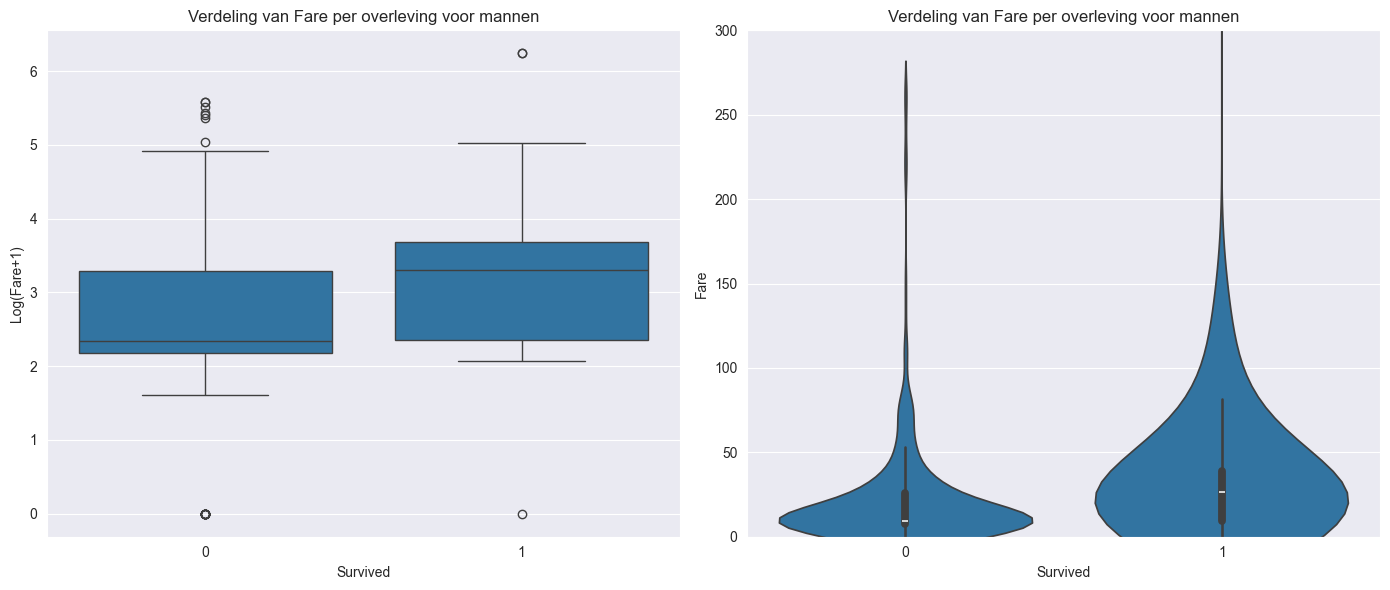

In [105]:
#plot om verband weer te geven tussen Fare van mannen en Survived op 2 manieren

#Filter voor mannen
train_male = train[train['Sex']=='male'].copy()
train_male['Fare_log'] = np.log1p(train_male['Fare'])  # log-transformatie

#Maak subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 rij, 2 kolommen

#Boxplot (links)
sns.boxplot(data=train_male, x='Survived', y='Fare_log', ax=axes[0])
axes[0].set_xlabel("Survived")
axes[0].set_ylabel("Log(Fare+1)")
axes[0].set_title("Verdeling van Fare per overleving voor mannen")

#Violinplot (rechts)
sns.violinplot(data=train_male, x='Survived', y='Fare', density_norm='width', ax=axes[1])
axes[1].set_ylim(0, 300)  #tegen uitspringers
axes[1].set_xlabel("Survived")
axes[1].set_ylabel("Fare")
axes[1].set_title("Verdeling van Fare per overleving voor mannen")

plt.tight_layout()
plt.show()

## 6. Feature Engineering

Voeg hier zelf extra features toe (bijv. `Title` uit `Name`, `FamilySize = SibSp + Parch + 1`, indicatoren, etc.).

Zorg wel dat het relevant is voor je eigen onderzoek. Waar ligt je eigen focus.

In [106]:
#handmatige check voor rulesets, hier wordt ook getweaked aan waardes om een zo goed mogelijke ruleset te maken

#nieuwe dataframe met alleen de rijen waar mensen het hebben overleefd
train_lived = train[train['Survived'] == 1]

#test_set = train[((train["Sex"]=="female") & (train["Pclass"]!=3)) |
#                 ((train["Sex"]=="female") & (train["Pclass"]==3) & (train["Age"]<40) & (train["Embarked"]=="C"))] #rule set vrouwen

test_set = train[((train["Sex"]=="male") & (train["Age"]<10)) |
                 ((train["Sex"]=="male") & (train["Pclass"]==1) & (train["Age"]<18)) |
                 ((train["Sex"]=="male") & (train["Fare"]>125) & (train["Fare"]<200)) |
                 ((train["Sex"]=="male") & (train["Fare"]>275)) |
                 ((train["Sex"]=="male") & (train["Pclass"]==2) & (train["Age"]<16)) |
                 ((train["Sex"]=="male") & (train["Age"]>75))] #ruleset mannen

print(f"procent correct: {test_set["Survived"].mean()*100}") #correcte percentage van levende mensen binnen de ruleset
print(f"levende volgens ruleset: {test_set["Survived"].count()}") #hoeveelheid levende mensen volgens de ruleset
print(f"daadwerkelijke levende: {test_set["Survived"].count() * test_set["Survived"].mean()}") #hoeveelheid levende mensen daadwerkelijk in de ruleset
print(f"totaal levende: {train_lived[train_lived["Sex"] == "male"]["Survived"].count()}") #hoeveelheid levende mensen totaal

procent correct: 62.5
levende volgens ruleset: 40
daadwerkelijke levende: 25.0
totaal levende: 109


## 7. Baseline model — np.where invullen

In [107]:
# === 3. Regelgebaseerde baseline met np.where ===
#Regels: vrouwen in ticketklasse 1 en 2, vrouwen onder 40 opgestapt in C in ticketklasse 3, mannen onder de 10, mannen onder de 18 in ticketklasse 1,
#mannen met een fare tussen de 125 en 200, mannen met een fare boven de 275, mannen onder de 16 in ticketklasse 16 en mannen boven de 75
rulesetcsv = np.where(
    # vrouwen
    ((test["Sex"]=="female") & (test["Pclass"]!=3)) |
    ((test["Sex"]=="female") & (test["Pclass"]==3) & (test["Age"]<40) & (test["Embarked"]=="C")) |

    # mannen
    ((test["Sex"]=="male") & (test["Age"]<10)) |
    ((test["Sex"]=="male") & (test["Pclass"]==1) & (test["Age"]<18)) |
    ((test["Sex"]=="male") & (test["Fare"]>125) & (test["Fare"]<200)) |
    ((test["Sex"]=="male") & (test["Fare"]>275)) |
    ((test["Sex"]=="male") & (test["Pclass"]==2) & (test["Age"]<16)) |
    ((test["Sex"]=="male") & (test["Age"]>75)),

    1, 0
)

## 8. Maak een eindmodel op volledige trainingsdata en voorspel op test

Hier kiezen we als voorbeeld het np.where model (of gebruik anders een ander model).


In [108]:
# === 4. Toepassen op testset ===
rulesetcsv = np.where(
    # vrouwen
    ((test["Sex"]=="female") & (test["Pclass"]!=3)) |
    ((test["Sex"]=="female") & (test["Pclass"]==3) & (test["Age"]<40) & (test["Embarked"]=="C")) |

    # mannen
    ((test["Sex"]=="male") & (test["Age"]<10)) |
    ((test["Sex"]=="male") & (test["Pclass"]==1) & (test["Age"]<18)) |
    ((test["Sex"]=="male") & (test["Fare"]>125) & (test["Fare"]<200)) |
    ((test["Sex"]=="male") & (test["Fare"]>275)) |
    ((test["Sex"]=="male") & (test["Pclass"]==2) & (test["Age"]<16)) |
    ((test["Sex"]=="male") & (test["Age"]>75)),

    1, 0
)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': rulesetcsv.astype(int)
})
((test["Sex"]=="female") & ((test["SibSp"]<3) | (test["Parch"]<2)))
submission.to_csv("submission.csv", index=False)

submission.to_csv("submission.csv", index=False)
print("submission.csv aangemaakt!")
submission.head()

submission.csv aangemaakt!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## 9. Checklist & Volgende stappen

- [ ] Zorg dat er een duidelijke samenhang is tussen de grafieken -> Feature Engineering -> je uiteindelijke model! Dat is het belangrijkst.
- [ ] Laat geen grafieken zien waar je niks mee doet tijdens de presentatie.
- [ ] Zorg dat er dus een rode draad is in je verhaal. 

Voorbeeld: We hebben de focus gelegd op leeftijd -> EDA laat deze grafieken met leeftijd zien. We hebben met Feature Engineering nog leeftijdsgroepen aangemaakt -> We hebben in het model de leeftijden gebruikt. Dit is onze score.

- [ ] Eventueel EDA (een klein beetje) uitbreiden (meer grafieken, correlaties, outliers)
- [ ] Feature engineering verbeteren (wat is er relevant?)
- [ ] Meer modellen proberen (Logistic Regression? Sklearn)
- [ ] Submission inleveren op kaggle en kijken hoe goed je score is

Succes met de case!